====== code adapted and modified from 'datasets_for_ml.ipynb' of A-PROOF repository https://github.com/cltl/a-proof-zonmw ======

# Statistics of the GPT data sets (Train / Dev sets) that are used for fine-tuning

In [11]:
import pandas as pd
import numpy as np

import sys
sys.path.insert(0, '../')
from utils.config import PATHS
from utils.latex import show_latex, TABLES

import matplotlib.pyplot as plt

In [2]:
domains=['ADM', 'ATT', 'BER', 'ENR', 'ETN', 'FAC', 'INS', 'MBW', 'STM']

## Load data

In [3]:
train = pd.read_pickle('../data/gpt/train_gpt_anonymized.pkl')
dev = pd.read_pickle('../data/gpt/dev_gpt_anonymized.pkl')

## Check correct split

i.e. there are no notes that appear in more than one set

In [4]:
# print(test.NotitieID.isin(train.NotitieID).any())
# print(dev.NotitieID.isin(train.NotitieID).any())
# print(dev.NotitieID.isin(test.NotitieID).any())

False
False
False


In [7]:
csv_filepath = '/home/cecilia.kuan@mydre.org/Desktop/j_train_text.csv'
train['text'].to_csv (csv_filepath, index=False, header=False)

## Number of sentences per class in each data set

- A sentence can contain more than one domain and therefore be counted more than once.
- The last column is the total number of sentences in the dataset (incl. all negative examples)

In [4]:
caption = "Category classification: datasets, sentence-level" # previously mistakenly called "Domain"
label = "category_datasets_sents"
latex_file = ('../data/gpt_num_sent_distro.pkl')

data = pd.concat([
    train.assign(dataset = 'train'),
    dev.assign(dataset = 'dev'),
]) #test.assign(dataset = 'test'),

balance = pd.DataFrame(
    index = pd.MultiIndex.from_frame(data[['dataset', 'NotitieID']]),
    columns = domains,
    data = data.labels.to_list()
)

dataset_sizes = balance.pivot_table(
    index='dataset',
    aggfunc='size',
).rename('n_sentences')

piv = balance.pivot_table(
    index='dataset',
    aggfunc='sum',
).join(dataset_sizes)
piv.loc['total'] = piv.sum()

t = piv.pipe(show_latex, caption=caption, label=label)
print(t)

# PRINT Latex format, save to file
report_latex = t.to_latex()
print(report_latex)

with open(latex_file, 'w') as tf:
     tf.write(report_latex)

           ADM    ATT    BER     ENR    ETN    FAC     INS    MBW    STM  \
dataset                                                                    
dev        477  1,050  1,525   2,199    946  1,845   2,501  1,422  1,000   
train    1,818  4,005  6,204   9,202  3,845  7,612   9,629  5,712  3,830   
total    2,295  5,055  7,729  11,401  4,791  9,457  12,130  7,134  4,830   

        n_sentences  
dataset              
dev          12,965  
train        51,857  
total        64,822  
\begin{tabular}{lllllllllll}
\toprule
 & ADM & ATT & BER & ENR & ETN & FAC & INS & MBW & STM & n_sentences \\
dataset &  &  &  &  &  &  &  &  &  &  \\
\midrule
dev & 477 & 1,050 & 1,525 & 2,199 & 946 & 1,845 & 2,501 & 1,422 & 1,000 & 12,965 \\
train & 1,818 & 4,005 & 6,204 & 9,202 & 3,845 & 7,612 & 9,629 & 5,712 & 3,830 & 51,857 \\
total & 2,295 & 5,055 & 7,729 & 11,401 & 4,791 & 9,457 & 12,130 & 7,134 & 4,830 & 64,822 \\
\bottomrule
\end{tabular}



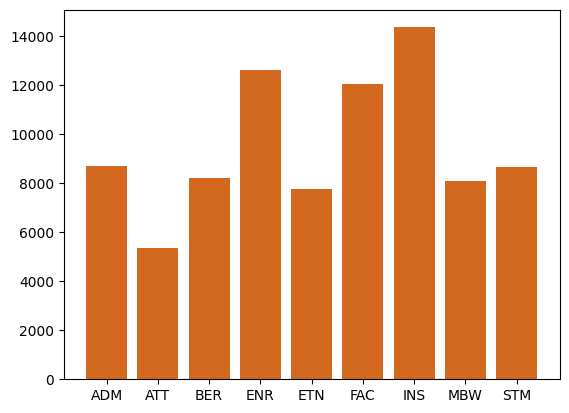

In [47]:
# GRAPHICAL PRESENTATION OF DATA QUANTITY IN EACH CLASS

bargraph_file = '../data/gpt/total_gpt-jenia_bar_graph.png'

domains = ['ADM', 'ATT', 'BER', 'ENR', 'ETN', 'FAC', 'INS', 'MBW', 'STM']
#num = [2295, 5055, 7729, 11401, 4791, 9457, 12130, 7134, 4830] #gpt
#num=[6385,309,471,1218,2956,2572,2218,938,3808] #jenia labeled sentences
num = [8680,5364,8200,12620,7747,12029,14348,8072,8638]

plt.bar(domains, num, color = ['chocolate'])#'plum', 'skyblue' 'mediumpurple'
plt.savefig(bargraph_file)
plt.show()

#num = piv['total'].T.to_list()
# num = piv.values[2].tolist()
# print(num)


# bar_dict = {}
# for d in domains:
#     for n in num:
#         bar_dict[d] = n
#         num.remove(n)
#         break


#ax = pd.DataFrame(bar_dict).T.plot.bar(zorder=5, color = ['violet'])

# fig = plt.figure()
# #ax = fig.add_axes([0,0,1,1])
# ax.bar(domains,num)
# plt.show()


# fig, ax = plt.subplots(figsize=(6, 4))
# piv.loc[['total']].xs('n', axis=1, level=1).iloc[:,:-1].T.plot.bar(
#     ax=ax,
#     legend=False, 
#     grid=True, 
#     title='GPT data',
# )